In [ ]:
#Importing and installltion of all the files and modules which will help in further analysis.
!pip install --quiet xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
#Upload  the file from the same
from google.colab import files
import io

print("Upload the file")
uploaded = files.upload()

Upload the file


Saving car_purchasing.csv to car_purchasing (2).csv


In [ ]:
#Reading the upload csv file into dataframes
dataset_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[dataset_name]), encoding='latin-1') # Added encoding='latin-1'
print(f"Loaded '{dataset_name}' with shape {df.shape}.")
df.head()

Loaded 'car_purchasing (1).csv' with shape (500, 9).


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
#Data cleaning process starts!!!
print("\nData Info:")
print(df.info())
print("\nMissing Values by Column:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None

Missing Values by Column:
customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [ ]:
#Data Preprocessing
##Handle Missing Values (Median Imputation)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    df[col]=df[col].fillna(df[col].median())

##Outlier Treatment
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

##Feature Scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

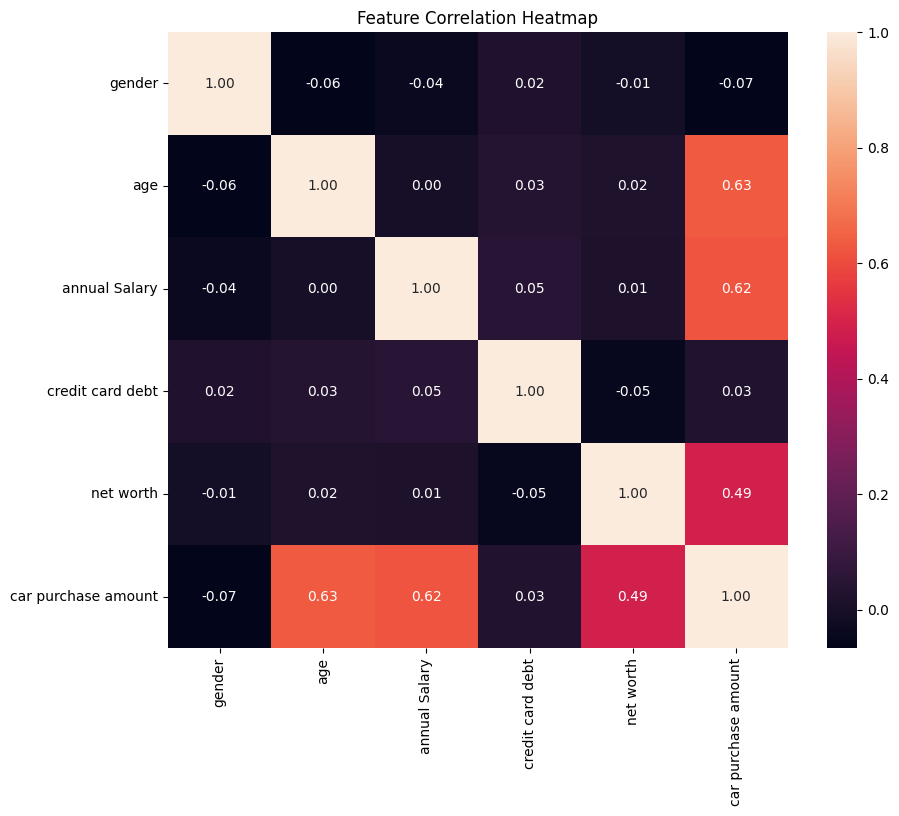

In [ ]:
#Exploratory Data Analysis
#Data visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()




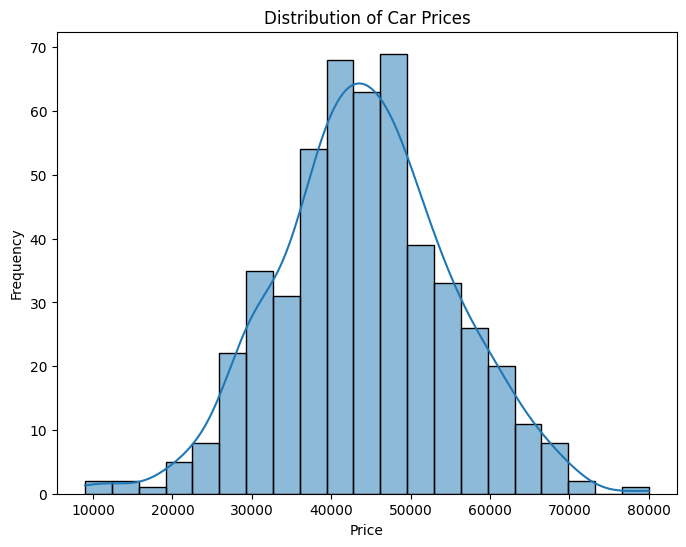

In [ ]:
# Assuming 'car purchase amount' represents the price
plt.figure(figsize=(8, 6))
sns.histplot(df['car purchase amount'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Prepare Features and Target
#Encode categorical columns if present
cat_cols = df.select_dtypes(include=['object']).columns.tolist() # Define cat_cols here

#Exclude 'Price' from categorical columns to prevent one-hot encoding
cat_cols = [col for col in cat_cols if col != 'car purchase amount']

if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']
print(y)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64


In [ ]:
#Model Training and Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{model.__class__.__name__} Results - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
]
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)


LinearRegression Results - MAE: 0.02, RMSE: 0.03, R2: 1.00
RandomForestRegressor Results - MAE: 0.16, RMSE: 0.23, R2: 0.95
XGBRegressor Results - MAE: 0.15, RMSE: 0.22, R2: 0.95


In [ ]:
#feature prediction
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
importances = best_model.feature_importances_
feat_imp = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
print("\nFeature Importances:")
print(feat_imp)



Feature Importances:
                                               feature  importance
1                                                  age    0.398438
2                                        annual Salary    0.369971
4                                            net worth    0.198790
3                                     credit card debt    0.008507
0                                               gender    0.001417
..                                                 ...         ...
36                      customer name_Beach, Victor S.    0.000000
625     customer e-mail_blandit.enim@lacusvariuset.org    0.000000
623  customer e-mail_bibendum.Donec.felis@liberoest...    0.000000
622            customer e-mail_augue@risusNuncac.co.uk    0.000000
650  customer e-mail_dictum.mi.ac@semperrutrumFusce...    0.000000

[1211 rows x 2 columns]


In [ ]:
# Congratulation your model is trained according to the data set now you can download it.
import joblib
joblib.dump(best_model, 'car_price_prediction_model.pkl')
print("Best model saved as 'car_price_prediction_model.pkl'.")


Best model saved as 'car_price_prediction_model.pkl'.
